A social graph can be represented in a vector space using a technique called Graph Embedding. With the connectivity structure as input, graph embedding algorithms output features for the nodes such that the original graph's topology is preserved in the feature space.

We use DeepWalk as the graph embedding algorithm. It uses random walks on the graph edges to infer the connectivity structure. It is an efficient algorithm in that its run time scales logarithmically with the number of nodes in the graph.

We use the features provided by the DeepWalk algoritm as an input to k-means clustering algorithm.

In [1]:
import artists_embedding_final06 as em
import warnings
warnings.filterwarnings('ignore')

In [2]:
n_artists = 10000
n_dims = 5

For each artist, we extract 20 similar artists from spotify and form the artist similarity graph usig breadth first search (BFS) algorithm. The bfs() function builds the artist similarity graph and writes the adjacency list of the graph to a file.

The bfs() function need not to be run if the graph is already built.

In [4]:
#em.bfs(n_artists)

The get_embeddings() function runs the DeepWalk algorithm and wrties the embeddings to a file.

The get_embeddings() function need not to be run if embedding file already exist.

In [5]:
#em.get_embeddings(n_artists,n_dims)

The Embedding_Analysis() class constructs an a pandas data frame from all the artists extracted from spotify. Each row of the data frame corresponds to an artist. The data frame includes the following column:

1. name: artist's name
2. popularity: artist popularity (according to spotify)
3. genres: a list of genres the artist worked
4. number of followers: the number of spotify followers
5. dim_1, dim_2, ..., dim_n: the features from DeepWalk
6. cluster_assignment: the cluster index from k-means
7. is_wmg: whether or not the artist is WMG artist

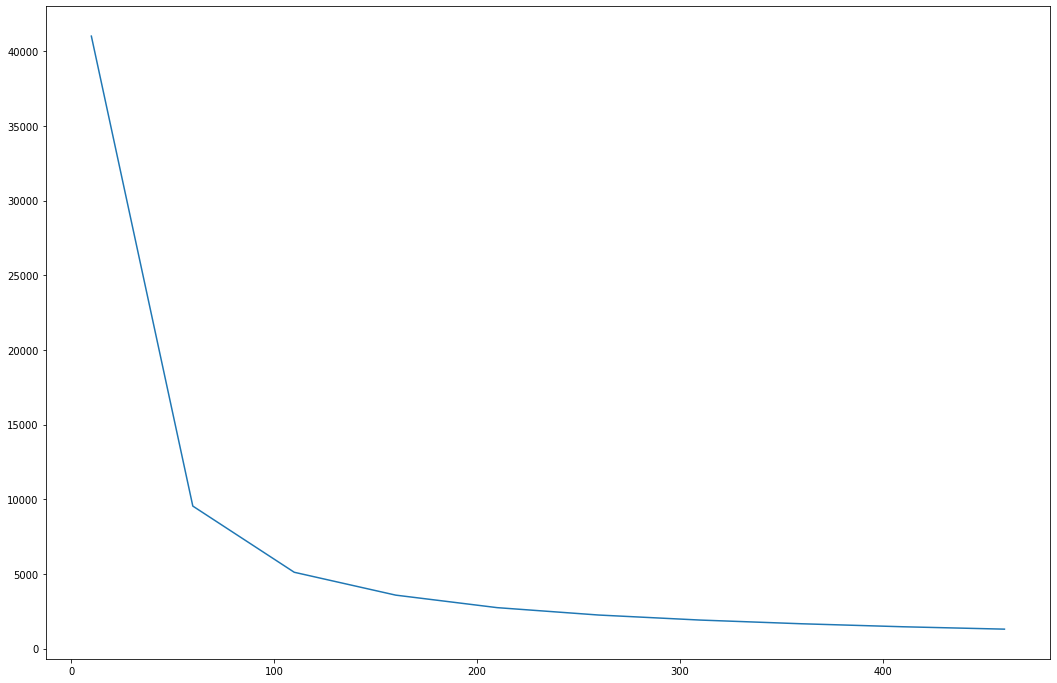

Type the optimum number of clusters:  100


In [6]:
E = em.Embedding_Analysis(n_artists,n_dims)

The from_snowflake() method extracts the name of WMG artists from snowflake.

In [7]:
E.from_snowflake()

The update_with_wmg() method populates the is_wmg column.

In [8]:
E.update_with_wmg()

After the dataframe is fully populated, for each cluster, we draw

1. the number of artists per genre for every genre in a cluster.
2. the probability density function of the number of artists in a genre.

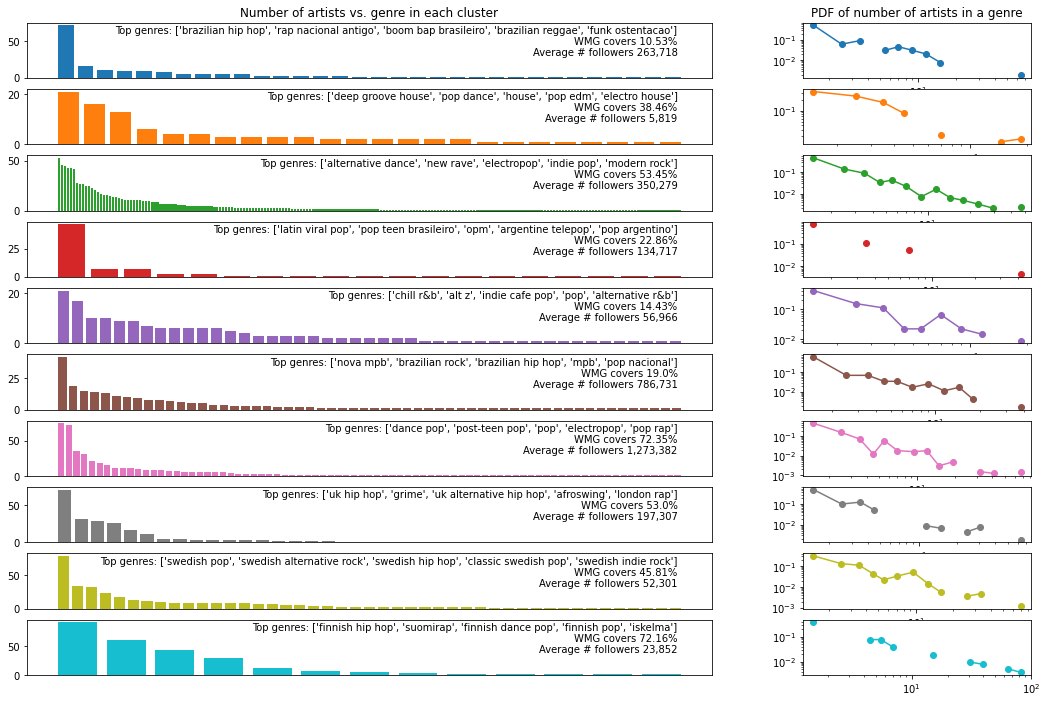

In [9]:
E.genre_dist()